# Author: Стурейко Игорь
## Project: Geekbrains.Algorithms
## Lesson 07 - k ближайших соседей (kNN)
## Date: 2020-09-13

In [56]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris, make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

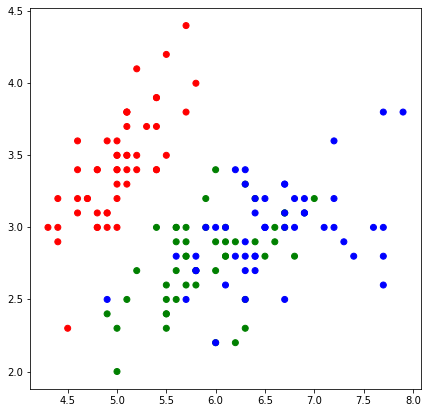

In [3]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [4]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

## Задание 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

В функции knn_n в расчете distance добавлено:

distance = e_metrics(x, x_train[i])*q**i

In [14]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [37]:
def knn_n(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            # c учетом веса по номеру соседа
            distance = e_metrics(x, x_train[i])*q**i
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [38]:
def get_graph_n(X_train, y_train, k, q):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_n(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [39]:
k = 1
q = 0.5

y_pred = knn_n(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

# get_graph_n(X_train, y_train, k, q)

Точность алгоритма при k = 1: 0.600


In [40]:
k = 3
q = 0.5

y_pred = knn_n(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

# get_graph_n(X_train, y_train, k, q)

Точность алгоритма при k = 3: 0.367


In [41]:
k = 5
q = 0.5

y_pred = knn_n(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

# get_graph_n(X_train, y_train, k, q)

Точность алгоритма при k = 5: 0.200


Точность алгоритма при k = 3, q = 0.9: 0.733


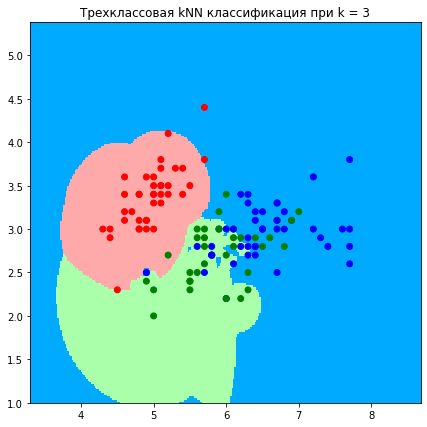

In [48]:
k = 3
q = 0.9

y_pred = knn_n(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

get_graph_n(X_train, y_train, k, q)

## Задание 2. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [30]:
def knn_w(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])*q**e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [31]:
k = 1
q = 0.5

y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


In [32]:
k = 3
q = 0.5

y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.700


In [49]:
k = 5
q = 0.5

y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.833


In [33]:
k = 7
q = 0.5

y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 7: 0.767


In [35]:
def get_graph_w(X_train, y_train, k, q):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_w(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 3: 0.700


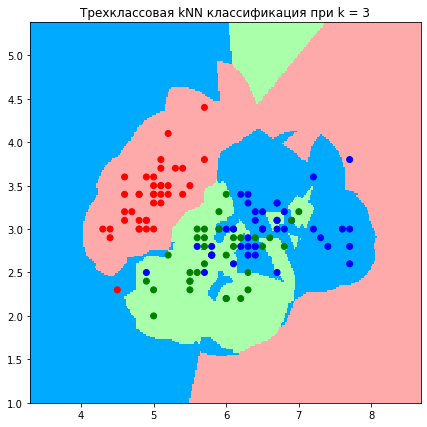

In [82]:
k = 3
q = 0.5

y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph_w(X_train, y_train, k, q)

Точность алгоритма при k = 5: 0.833


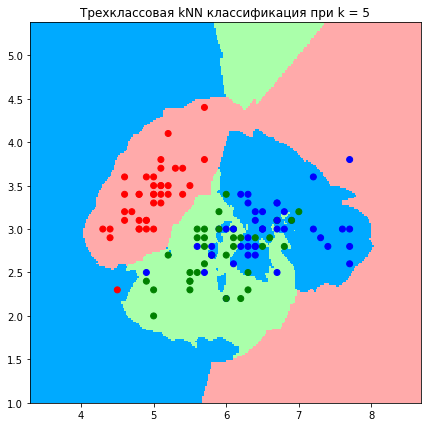

In [83]:
k = 5
q = 0.5
y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph_w(X_train, y_train, k, q)

Точность алгоритма при k = 5: 0.333


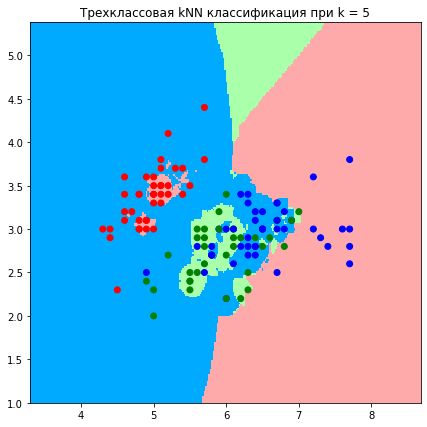

In [86]:
k = 5
q = 0.3
y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph_w(X_train, y_train, k, q)

Точность алгоритма при k = 5: 0.867


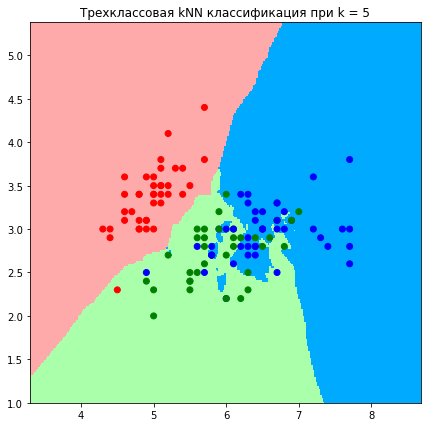

In [87]:
k = 5
q = 0.8
y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph_w(X_train, y_train, k, q)

### Выводы: с возрастанием коэффициента q от которого рассчитывается вес - сложность поверхности уменьшается

## Задание 3. Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [52]:
k = 3
q = 0.9

y_pred = knn_n(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3, q = 0.9: 0.733


In [51]:
k = 5
q = 0.5

y_pred = knn_w(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.833


### Выводы: для алгоритма п2 удаелось подобрать параметры для лучшей классификации

## Задание 4* Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [71]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    # среднеквадратичные среднекласстерные расстояния
    msd = (np.zeros(k))
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    for class_item in classes:
        for x in classes[class_item]:
            msd[class_item] += np.sqrt(
                (x[0]-centroids[class_item][0])**2 + 
                (x[1]-centroids[class_item][1])**2)
    return old_centroids, classes, msd.mean()

In [72]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [73]:
X, y = make_blobs(n_samples=100, random_state=1)

# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

centroids, clusters, msd = kmeans(X, k, max_iterations, min_distance)
print(msd)

# visualize(centroids, clusters)

390.9187549225946


In [74]:
# сразу определим известное нам количество кластеров
k = 2

centroids, clusters, msd = kmeans(X, k, max_iterations, min_distance)
print(msd)

231.07683386203226


In [81]:
print('Cреднее квадратичное внутриклассовое расстояние (MSD) от количества классов k')
for cluster_nums in np.arange(1, 11):
    centroids, clusters, msd = kmeans(X, cluster_nums, max_iterations, min_distance)
    print(f'k = {cluster_nums},\tMSD = {msd:5.4f}')

Cреднее квадратичное внутриклассовое расстояние (MSD) от количества классов k
k = 1,	MSD = 1230.2503
k = 2,	MSD = 231.0768
k = 3,	MSD = 390.9188
k = 4,	MSD = 262.4396
k = 5,	MSD = 190.8723
k = 6,	MSD = 152.3402
k = 7,	MSD = 123.0359
k = 8,	MSD = 105.4803
k = 9,	MSD = 84.2117
k = 10,	MSD = 71.9824
